In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import anndata as ad 
import scanpy as sc
sys.path.append("../")
import utils
from sklearn.decomposition import PCA
import umap
import graph
import visualize

In [2]:
sys.executable

'/home/bkzhu/python/miniconda3/envs/spatial_cluster/bin/python3'

# first check umaps

### just feature alone

In [6]:
df = pd.read_csv("/home/bkzhu/spatial_clustering/phase2/data/tonsil/results/50k_features_and_metadata.csv")

In [7]:
df

Unnamed: 0  cellLabelInImage  cellSize     HOECHST1      CD38  \
0               1                 1        45  7577.133333  0.042709   
1               2                 2        67  5689.014925  0.411814   
2               3                 3        54  2918.629630  0.181537   
3               5                 5        40  3712.550000  0.105352   
4               6                 6        65  9896.523077  0.109826   
...           ...               ...       ...          ...       ...   
49995       55670               835       311  6058.299035  0.638924   
49996       55671               836       214  5756.149533  0.000000   
49997       55672               837       300  5755.386667  0.168224   
49998       55673               838       261  4873.570881  0.057420   
49999       55674               839       259  8328.440154  0.056003   

           CD19      CD31  Vimentin      CD22      Ki67  ...      CD40  \
0      0.126471  0.013933  0.167720  0.378127  0.022083  ...  0.193192   
1      0.274831  0.078204  0.242115  0.732288  0.032531  ...  0.354364   
2      0.049070  0.107920  0.256650  0.136265  0.046391  ...  0.000000   
3      0.355472  0.123463  1.000000  0.244163  0.039550  ...  0.397868   
4      0.489116  0.077057  0.566872  1.000000  0.021881  ...  0.547654   
...         ...       ...       ...       ...       ...  ...       ...   
49995  0.054459  0.031454  0.314982  0.000000  0.022821  ...  0.011199   
49996  0.475483  0.000000  0.213688  0.608002  0.026770  ...  0.080949   
49997  0.532975  0.080517  0.633821  0.665354  0.028774  ...  0.416888   
49998  0.013149  0.288883  0.697770  0.036439  0.039066  ...  0.063948   
49999  0.087534  0.020951  0.371136  0.038677  0.018859  ...  0.016967   

          CD274      CD27     CD104     CD273  FAPalpha  Ecadherin  \
0      0.041146  0.017326  0.016006  0.021456  0.000000   0.294373   
1      0.761689  0.296546  0.046936  0.242958  0.195214   0.518544   
2      0.821606  0.029158  0.066806  0.087647  0.168854   0.798743   
3      0.236057  0.024758  0.139895  0.123207  0.769419   0.384925   
4      0.162656  0.065785  0.022732  0.033790  0.159045   0.220309   
...         ...       ...       ...       ...       ...        ...   
49995  0.203264  0.816243  0.000000  0.127500  0.178018   0.205869   
49996  0.155267  0.065045  0.019157  0.000000  0.010297   0.090033   
49997  0.373882  0.113062  0.062144  0.111245  0.183768   0.247454   
49998  0.360412  0.295436  1.000000  0.260311  1.000000   0.521428   
49999  0.121532  1.000000  0.052394  0.110239  0.250913   0.140214   

       cluster.term   centroid_x   centroid_y  
0       B-CD22-CD40     1.822222   797.333333  
1       B-CD22-CD40     2.149254  1335.044776  
2         Fibro/Epi     1.685185    56.740741  
3       B-CD22-CD40     1.825000   652.025000  
4       B-CD22-CD40     2.246154   683.676923  
...             ...          ...          ...  
49995         CD4 T  3199.726688  2333.601286  
49996   B-CD22-CD40  3200.602804  2506.523364  
49997   B-CD22-CD40  3200.346667  2623.786667  
49998         Other  3201.126437  1628.980843  
49999         CD4 T  3201.362934  2033.884170  

[50000 rows x 53 columns]

In [4]:
protein = df.columns[4:50]
protein

Index(['CD38', 'CD19', 'CD31', 'Vimentin', 'CD22', 'Ki67', 'CD8', 'CD90',
       'CD123', 'CD15', 'CD3', 'CD152', 'CD21', 'cytokeratin', 'CD2', 'CD66',
       'collagen IV', 'CD81', 'HLA-DR', 'CD57', 'CD4', 'CD7', 'CD278',
       'podoplanin', 'CD45RA', 'CD34', 'CD54', 'CD9', 'IGM', 'CD117', 'CD56',
       'CD279', 'CD45', 'CD49f', 'CD5', 'CD16', 'CD63', 'CD11b', 'CD1c',
       'CD40', 'CD274', 'CD27', 'CD104', 'CD273', 'FAPalpha', 'Ecadherin'],
      dtype='object')

In [5]:
features = df[protein]
features

CD38      CD19      CD31  Vimentin      CD22      Ki67       CD8  \
0      0.042709  0.126471  0.013933  0.167720  0.378127  0.022083  0.070043   
1      0.411814  0.274831  0.078204  0.242115  0.732288  0.032531  0.129478   
2      0.181537  0.049070  0.107920  0.256650  0.136265  0.046391  0.277171   
3      0.105352  0.355472  0.123463  1.000000  0.244163  0.039550  0.052428   
4      0.109826  0.489116  0.077057  0.566872  1.000000  0.021881  0.078402   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.638924  0.054459  0.031454  0.314982  0.000000  0.022821  0.000000   
49996  0.000000  0.475483  0.000000  0.213688  0.608002  0.026770  0.012245   
49997  0.168224  0.532975  0.080517  0.633821  0.665354  0.028774  0.028680   
49998  0.057420  0.013149  0.288883  0.697770  0.036439  0.039066  1.000000   
49999  0.056003  0.087534  0.020951  0.371136  0.038677  0.018859  0.392287   

           CD90     CD123      CD15  ...      CD63     CD11b      CD1c  \
0      0.067047  0.022052  0.000000  ...  0.000000  0.146570  1.000000   
1      0.810394  0.062798  0.251918  ...  0.240198  0.249335  0.440181   
2      0.691730  0.078809  1.000000  ...  0.371206  0.702021  0.098512   
3      0.453860  0.393803  0.262383  ...  0.546062  0.538690  0.885754   
4      0.321497  0.109863  0.380906  ...  0.130909  0.390001  0.852458   
...         ...       ...       ...  ...       ...       ...       ...   
49995  0.577795  0.000000  0.240636  ...  0.209082  0.317507  0.051722   
49996  0.056353  0.000000  0.145057  ...  0.009030  0.020021  0.336802   
49997  0.453850  0.123293  0.163326  ...  0.364582  0.159851  0.671012   
49998  0.404539  0.248002  0.403552  ...  0.483355  0.520930  0.070198   
49999  0.421142  0.000000  0.139728  ...  0.085482  0.408705  0.081050   

           CD40     CD274      CD27     CD104     CD273  FAPalpha  Ecadherin  
0      0.193192  0.041146  0.017326  0.016006  0.021456  0.000000   0.294373  
1      0.354364  0.761689  0.296546  0.046936  0.242958  0.195214   0.518544  
2      0.000000  0.821606  0.029158  0.066806  0.087647  0.168854   0.798743  
3      0.397868  0.236057  0.024758  0.139895  0.123207  0.769419   0.384925  
4      0.547654  0.162656  0.065785  0.022732  0.033790  0.159045   0.220309  
...         ...       ...       ...       ...       ...       ...        ...  
49995  0.011199  0.203264  0.816243  0.000000  0.127500  0.178018   0.205869  
49996  0.080949  0.155267  0.065045  0.019157  0.000000  0.010297   0.090033  
49997  0.416888  0.373882  0.113062  0.062144  0.111245  0.183768   0.247454  
49998  0.063948  0.360412  0.295436  1.000000  0.260311  1.000000   0.521428  
49999  0.016967  0.121532  1.000000  0.052394  0.110239  0.250913   0.140214  

[50000 rows x 46 columns]

In [6]:
pca = PCA(n_components=15)
features_after_pca = pca.fit_transform(features)
umap_fit = umap.UMAP(random_state=42)
umap_embed = umap_fit.fit_transform(features_after_pca)

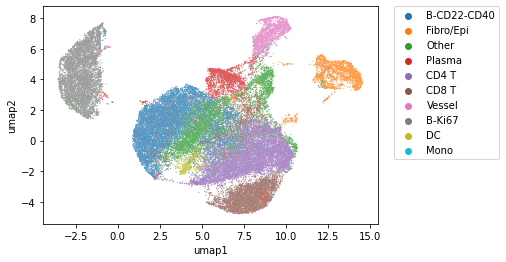

In [7]:
umap_embed = pd.DataFrame(umap_embed, columns = ['umap1', 'umap2'])
umap_embed['type'] = df['cluster.term']
sns.scatterplot(data=umap_embed, x='umap1', y='umap2', hue='type', s=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### vanilla gnn

In [8]:
gnn_embed = np.load('/home/bkzhu/spatial_clustering/phase2/data/tonsil/results/50k_vanila_gnn_embeddings.npy')

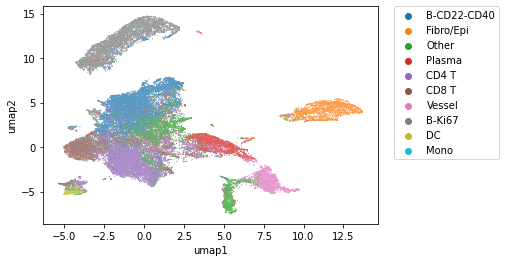

In [9]:
pca = PCA(n_components=15)
features_after_pca = pca.fit_transform(features)

gnn_after_pca = pca.fit_transform(gnn_embed)
umap_fit = umap.UMAP(random_state=42)
umap_gnn = umap_fit.fit_transform(gnn_after_pca)
#
umap_embed_gnn = pd.DataFrame(umap_gnn, columns = ['umap1', 'umap2'])
umap_embed_gnn['type'] = df['cluster.term']
sns.scatterplot(data=umap_embed_gnn, x='umap1', y='umap2', hue='type', s=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### convgnn

In [10]:
convgnn_embed = np.load('/home/bkzhu/spatial_clustering/phase2/data/tonsil/results/50k_conv_gnn_embeddings.npy')

In [11]:
convgnn_embed.shape

(50000, 40)

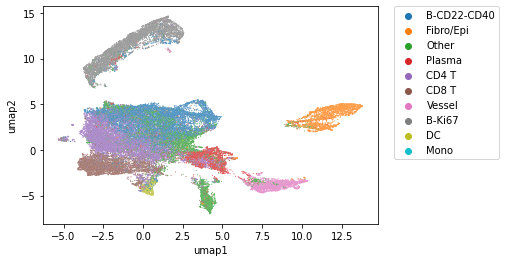

In [12]:
convgnn_after_pca = pca.fit_transform(convgnn_embed)
#umap_fit = umap.UMAP(random_state=42)
umap_convgnn = umap_fit.fit_transform(convgnn_after_pca)
#
umap_embed_convgnn = pd.DataFrame(umap_convgnn, columns = ['umap1', 'umap2'])
umap_embed_convgnn['type'] = df['cluster.term']
sns.scatterplot(data=umap_embed_convgnn, x='umap1', y='umap2', hue='type', s=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# now we need to run clustering on vanila features or convGNN features

In [13]:
# clustering on vanila feature graphs

feature_edges = graph.get_feature_edges(
        arr=features.to_numpy(), pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
feature_labels = graph.graph_clustering(
        features.shape[0], feature_edges, resolution=None, n_clusters=20, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )

In [14]:
# do this again on vanilla gnn features

feature_edges_gnn = graph.get_feature_edges(
        arr=gnn_embed, pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
feature_labels_gnn = graph.graph_clustering(
        gnn_embed.shape[0], feature_edges_gnn, resolution=None, n_clusters=20, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )

In [15]:
# do this again on convGNN features

feature_edges_conv = graph.get_feature_edges(
        arr=convgnn_embed, pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
feature_labels_conv = graph.graph_clustering(
        convgnn_embed.shape[0], feature_edges_conv, resolution=None, n_clusters=20, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )

In [16]:
unique, counts = np.unique(feature_labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 7358]
 [   1 5770]
 [   2 5414]
 [   3 5204]
 [   4 2976]
 [   5 2824]
 [   6 2690]
 [   7 2430]
 [   8 2197]
 [   9 2175]
 [  10 1953]
 [  11 1766]
 [  12 1722]
 [  13 1661]
 [  14 1110]
 [  15 1092]
 [  16 1015]
 [  17  353]
 [  18  231]
 [  19   59]]


In [17]:
unique, counts = np.unique(feature_labels_gnn, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 6759]
 [   1 6067]
 [   2 4410]
 [   3 4101]
 [   4 3914]
 [   5 3400]
 [   6 3289]
 [   7 3172]
 [   8 3099]
 [   9 3021]
 [  10 2665]
 [  11 1873]
 [  12 1690]
 [  13 1451]
 [  14  273]
 [  15  255]
 [  16  254]
 [  17  199]
 [  18   71]
 [  19   37]]


In [18]:
unique, counts = np.unique(feature_labels_conv, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 5894]
 [   1 5234]
 [   2 5169]
 [   3 4717]
 [   4 3985]
 [   5 3470]
 [   6 3316]
 [   7 3114]
 [   8 2967]
 [   9 2710]
 [  10 2178]
 [  11 1715]
 [  12 1689]
 [  13 1599]
 [  14  962]
 [  15  780]
 [  16  231]
 [  17  182]
 [  18   54]
 [  19   34]]


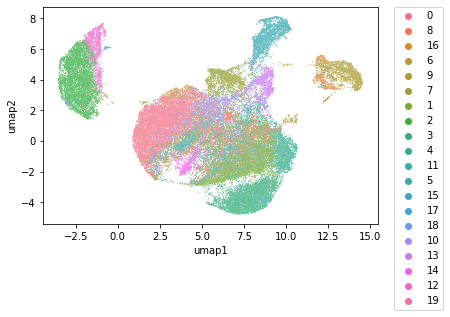

In [19]:
umap_embed['label'] = list(map(str, feature_labels))
sns.scatterplot(data=umap_embed, x='umap1', y='umap2', hue='label', s=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

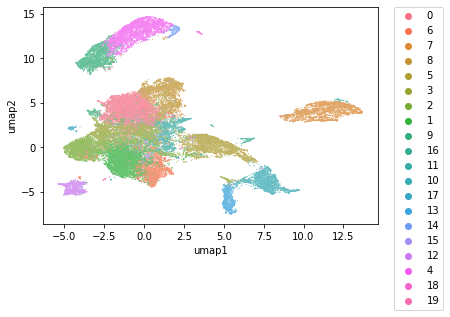

In [20]:
umap_embed_gnn['label'] = list(map(str, feature_labels_gnn))
sns.scatterplot(data=umap_embed_gnn, x='umap1', y='umap2', hue='label', s=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

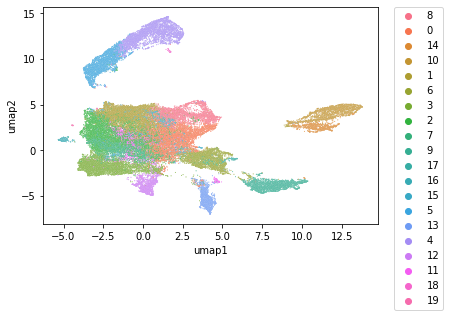

In [21]:
umap_embed_convgnn['label'] = list(map(str, feature_labels_conv))
sns.scatterplot(data=umap_embed_convgnn, x='umap1', y='umap2', hue='label', s=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# now we check heatmap

In [22]:
features['label1'] = list(map(str, feature_labels))
features['label2'] = list(map(str, feature_labels_conv))
features['label3'] = list(map(str, feature_labels_gnn))

/tmp/ipykernel_24363/2120677287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label1'] = list(map(str, feature_labels))
/tmp/ipykernel_24363/2120677287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label2'] = list(map(str, feature_labels_conv))
/tmp/ipykernel_24363/2120677287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [23]:
features

CD38      CD19      CD31  Vimentin      CD22      Ki67       CD8  \
0      0.042709  0.126471  0.013933  0.167720  0.378127  0.022083  0.070043   
1      0.411814  0.274831  0.078204  0.242115  0.732288  0.032531  0.129478   
2      0.181537  0.049070  0.107920  0.256650  0.136265  0.046391  0.277171   
3      0.105352  0.355472  0.123463  1.000000  0.244163  0.039550  0.052428   
4      0.109826  0.489116  0.077057  0.566872  1.000000  0.021881  0.078402   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.638924  0.054459  0.031454  0.314982  0.000000  0.022821  0.000000   
49996  0.000000  0.475483  0.000000  0.213688  0.608002  0.026770  0.012245   
49997  0.168224  0.532975  0.080517  0.633821  0.665354  0.028774  0.028680   
49998  0.057420  0.013149  0.288883  0.697770  0.036439  0.039066  1.000000   
49999  0.056003  0.087534  0.020951  0.371136  0.038677  0.018859  0.392287   

           CD90     CD123      CD15  ...      CD40     CD274      CD27  \
0      0.067047  0.022052  0.000000  ...  0.193192  0.041146  0.017326   
1      0.810394  0.062798  0.251918  ...  0.354364  0.761689  0.296546   
2      0.691730  0.078809  1.000000  ...  0.000000  0.821606  0.029158   
3      0.453860  0.393803  0.262383  ...  0.397868  0.236057  0.024758   
4      0.321497  0.109863  0.380906  ...  0.547654  0.162656  0.065785   
...         ...       ...       ...  ...       ...       ...       ...   
49995  0.577795  0.000000  0.240636  ...  0.011199  0.203264  0.816243   
49996  0.056353  0.000000  0.145057  ...  0.080949  0.155267  0.065045   
49997  0.453850  0.123293  0.163326  ...  0.416888  0.373882  0.113062   
49998  0.404539  0.248002  0.403552  ...  0.063948  0.360412  0.295436   
49999  0.421142  0.000000  0.139728  ...  0.016967  0.121532  1.000000   

          CD104     CD273  FAPalpha  Ecadherin  label1  label2  label3  
0      0.016006  0.021456  0.000000   0.294373       0       8       0  
1      0.046936  0.242958  0.195214   0.518544       8       0       6  
2      0.066806  0.087647  0.168854   0.798743      16      14       7  
3      0.139895  0.123207  0.769419   0.384925       6       8       8  
4      0.022732  0.033790  0.159045   0.220309       0       8       8  
...         ...       ...       ...        ...     ...     ...     ...  
49995  0.000000  0.127500  0.178018   0.205869       1       7       1  
49996  0.019157  0.000000  0.010297   0.090033       0       1       0  
49997  0.062144  0.111245  0.183768   0.247454       0       8       0  
49998  1.000000  0.260311  1.000000   0.521428      13      13      13  
49999  0.052394  0.110239  0.250913   0.140214       1       2       1  

[50000 rows x 49 columns]

## feature only

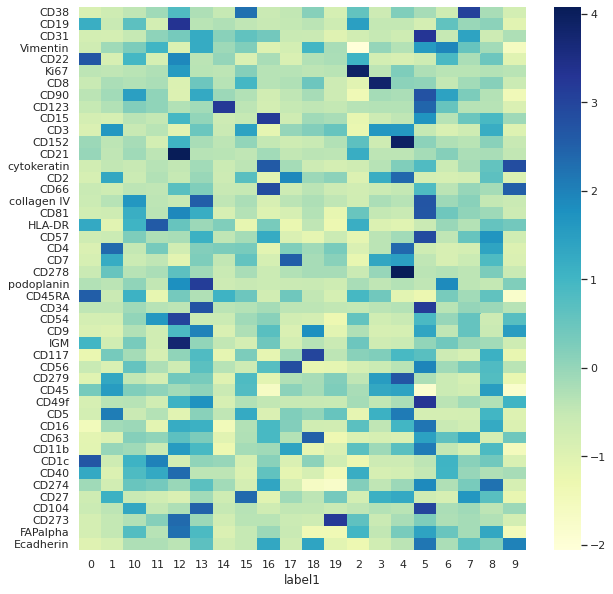

In [24]:
from scipy import stats
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

tmp = features.groupby(by='label1').mean()
#tmp = tmp.drop(['label1', 'label2'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu",xticklabels=True, yticklabels=True)

0: CD4
1: CD8
10: ki67-B
11: other
12: other
13: other
14: DC
2: CD22-B
3: CD22-B
4: CD21-B
5: CD278 CD4
6: Fibro
7: Empty
8: other
9: Plasma

## vanilla gnn

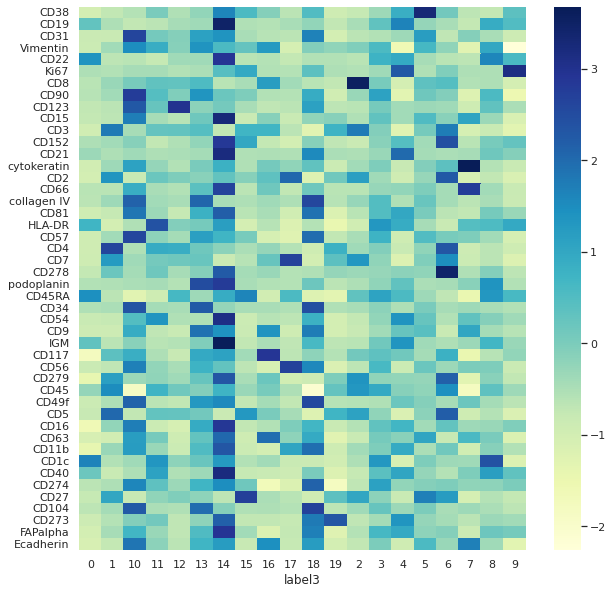

In [25]:
from scipy import stats
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

tmp = features.groupby(by='label3').mean()
#tmp = tmp.drop(['label1', 'label2'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu",xticklabels=True, yticklabels=True)

0: CD4
1: CD22-B
10: ki67-B
11: other
12: DC
13: other
14: other
2: CD21-B
3: CD8
4: other
5: Plasma
6: Fibro
7: CD274 CD4
8: other
9: CD22-B

## conv GNN

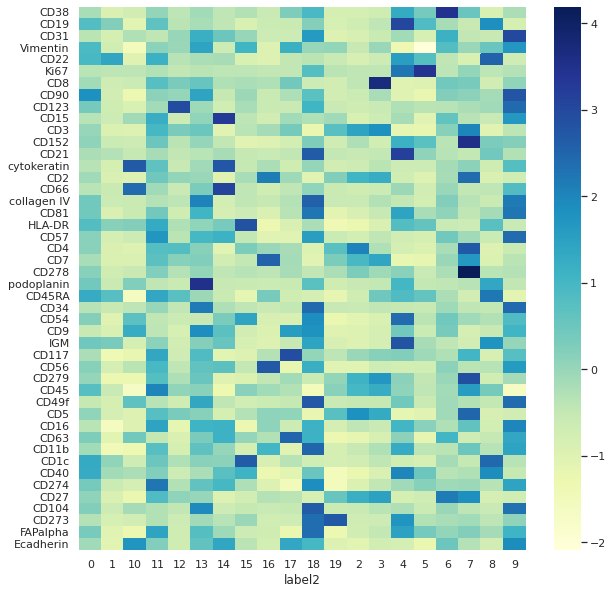

In [27]:
tmp = features.groupby(by='label2').mean()
#tmp = tmp.drop(['label1', 'label2'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu",xticklabels=True, yticklabels=True)

0: CD22-B (small?)
1: cant tell, seems mixed with cd4 and b cells
10: other
11: CD22-B
12: other
13: other
14: other
2: CD278 CD4
3: CD21-B
4: CD8
5: Plasma
6: Fibro
7: Vessel
8: Ki67-B
9: DC

## problem here, cluster 1 in convGNN 1 is mixed but not a issue in feato/vanilla
## check shape informaotin

In [3]:
images = np.load('/home/bkzhu/spatial_clustering/phase2/data/tonsil/results/50k_images_pad.npy')

In [13]:
np.unique(df['cluster.term'])

array(['B-CD22-CD40', 'B-Ki67', 'CD4 T', 'CD8 T', 'DC', 'Fibro/Epi',
       'Mono', 'Other', 'Plasma', 'Vessel'], dtype=object)

### check some cluster1

<Figure size 1296x288 with 0 Axes>

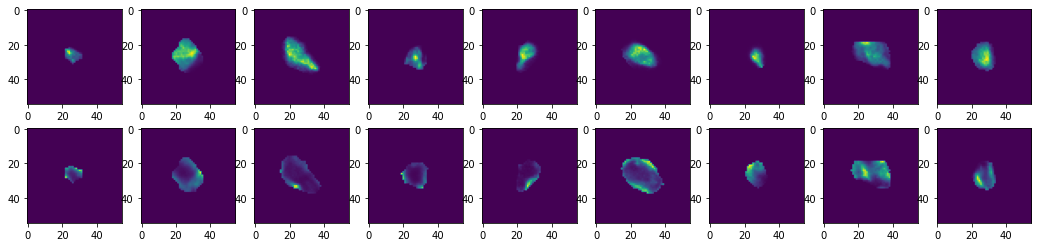

In [16]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'Fibro/Epi').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

In [ ]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'B-Ki67').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

In [43]:
sns.reset_orig
plt.style.use('default')

### check some other clusters

In [ ]:
idx = np.random.choice(np.nonzero((features['label2'] == '0').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

In [ ]:
idx = np.random.choice(np.nonzero((features['label2'] == '2').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

## try look at there spatial locations


## actually can not this on tonsil_50k for now hold.

In [ ]:
def fill_clusters_to_segmentation(df, views, shape,
                                  path='../../data/codex_murine/segmentation_results/',
                                  colnames=('cell_view', 'cellLabelInImage', 'clust_label')):
    """
    Fill cluster labels to the segmentation matrices in views,
    concatenate them, and return the overall matrix.
    Also return idx_to_label, a dict of {idx_in_seg_mat_after_filling_in_clust_labels: original_clust_label}.
    df must contain the following columns:
        - colnames[0]: which view is each cell in
        - colnames[1]: the segmentation index of each cell
        - colnames[2]: the cluster label of each cell.
    """
    assert shape[0] * shape[1] == len(views)
    # recode clusters to integers starting from zero
    clust_labels, new_to_old = recode(df[colnames[2]])
    # in the filling process, 0 is reserved for empty
    new_to_old = {new + 1: old for new, old in new_to_old.items()}
    new_to_old[0] = 'empty'

    # fill in the first column
    start, end = 0, shape[0]
    islands = fill_clusters_one_column(df, clust_labels, views[start:end], path, colnames[:2])
    while end < len(views):
        start = end
        end += shape[0]
        islands = np.concatenate(
            (islands, fill_clusters_one_column(
                df, clust_labels, views[start:end], path, colnames[:2]
            )), axis=1
        )
    return islands, new_to_old

In [28]:
df_full = pd.read_csv('/home/bkzhu/spatial_clustering/phase2/data/tonsil/results/all_clusters.csv')

In [73]:
#pd.options.mode.chained_assignment = None  # default='warn'
df_full_noMix = df_full[df_full['cluster.term'] != 'mix']
df_full_noMix50k = df_full_noMix.iloc[0:50000,]

df_full_noMix50k.loc[:,'convgnn'] = list(map(str, feature_labels_conv))
df_full_noMix50k.loc[:,'vngnn'] = list(map(str, feature_labels_gnn))
df_full_noMix50k.loc[:,'feature'] = list(map(str, feature_labels))

df_full_noMix50k.loc[:,'x'] = df.loc[:,'centroid_x'].tolist()
df_full_noMix50k.loc[:,'y'] = df.loc[:,'centroid_y'].tolist()
df_full_noMix50k

Unnamed: 0  cellLabelInImage  cellSize     HOECHST1      CD38  \
0               1                 1        45  7577.133333  0.042709   
1               2                 2        67  5689.014925  0.411814   
2               3                 3        54  2918.629630  0.181537   
4               5                 5        40  3712.550000  0.105352   
5               6                 6        65  9896.523077  0.109826   
...           ...               ...       ...          ...       ...   
54852       55670               835       311  6058.299035  0.638924   
54853       55671               836       214  5756.149533  0.000000   
54854       55672               837       300  5755.386667  0.168224   
54855       55673               838       261  4873.570881  0.057420   
54856       55674               839       259  8328.440154  0.056003   

           CD19      CD31  Vimentin      CD22      Ki67  ...  FAPalpha  \
0      0.126471  0.013933  0.167720  0.378127  0.022083  ...  0.000000   
1      0.274831  0.078204  0.242115  0.732288  0.032531  ...  0.195214   
2      0.049070  0.107920  0.256650  0.136265  0.046391  ...  0.168854   
4      0.355472  0.123463  1.000000  0.244163  0.039550  ...  0.769419   
5      0.489116  0.077057  0.566872  1.000000  0.021881  ...  0.159045   
...         ...       ...       ...       ...       ...  ...       ...   
54852  0.054459  0.031454  0.314982  0.000000  0.022821  ...  0.178018   
54853  0.475483  0.000000  0.213688  0.608002  0.026770  ...  0.010297   
54854  0.532975  0.080517  0.633821  0.665354  0.028774  ...  0.183768   
54855  0.013149  0.288883  0.697770  0.036439  0.039066  ...  1.000000   
54856  0.087534  0.020951  0.371136  0.038677  0.018859  ...  0.250913   

       Ecadherin            PointNum  cluster.term  seurat_res1.0  convgnn  \
0       0.294373  reg001_X02_Y05_Z09   B-CD22-CD40              4        8   
1       0.518544  reg001_X02_Y05_Z09   B-CD22-CD40              8        0   
2       0.798743  reg001_X02_Y05_Z09     Fibro/Epi             15       14   
4       0.384925  reg001_X02_Y05_Z09   B-CD22-CD40              7        8   
5       0.220309  reg001_X02_Y05_Z09   B-CD22-CD40              0        8   
...          ...                 ...           ...            ...      ...   
54852   0.205869  reg001_X03_Y08_Z09         CD4 T              1        7   
54853   0.090033  reg001_X03_Y08_Z09   B-CD22-CD40              4        1   
54854   0.247454  reg001_X03_Y08_Z09   B-CD22-CD40              0        8   
54855   0.521428  reg001_X03_Y08_Z09         Other             12       13   
54856   0.140214  reg001_X03_Y08_Z09         CD4 T              3        2   

       vngnn  feature            x            y  
0          0        0     1.822222   797.333333  
1          6        8     2.149254  1335.044776  
2          7       16     1.685185    56.740741  
4          8        6     1.825000   652.025000  
5          8        0     2.246154   683.676923  
...      ...      ...          ...          ...  
54852      1        1  3199.726688  2333.601286  
54853      0        0  3200.602804  2506.523364  
54854      0        0  3200.346667  2623.786667  
54855     13       13  3201.126437  1628.980843  
54856      1        1  3201.362934  2033.884170  

[50000 rows x 58 columns]

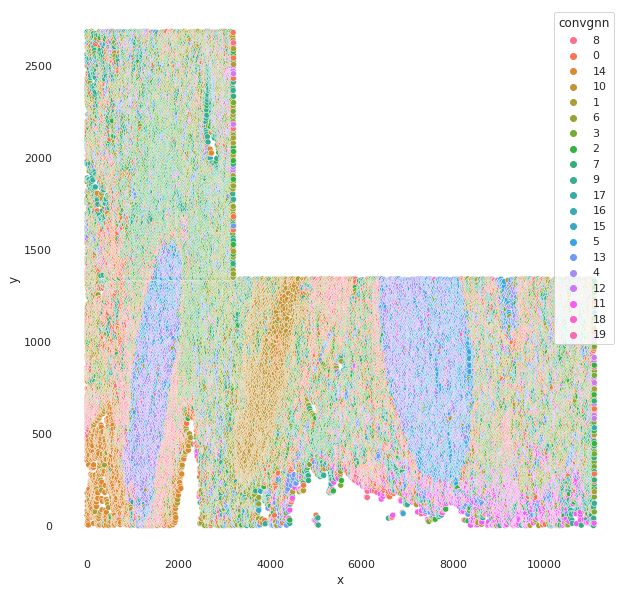

In [74]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k, x="x", y="y", hue="convgnn",legend="full"
)

In [75]:
cond = df_full_noMix50k['PointNum'].isin(['reg001_X02_Y05_Z09','reg001_X02_Y06_Z08','reg001_X02_Y07_Z09',
                                  'reg001_X03_Y05_Z08','reg001_X03_Y06_Z08','reg001_X03_Y07_Z08'])

df_full_noMix50k_6fov = df_full_noMix50k[cond]

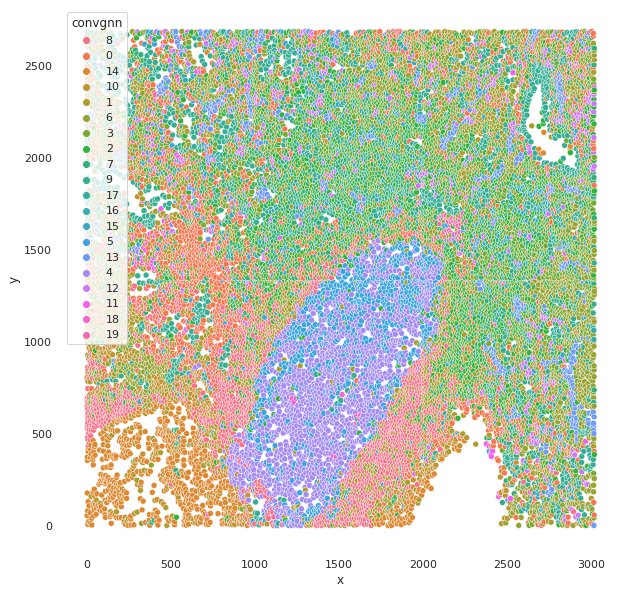

In [76]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k_6fov, x="x", y="y", hue="convgnn",legend="full"
)

/tmp/ipykernel_24363/1632685485.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]


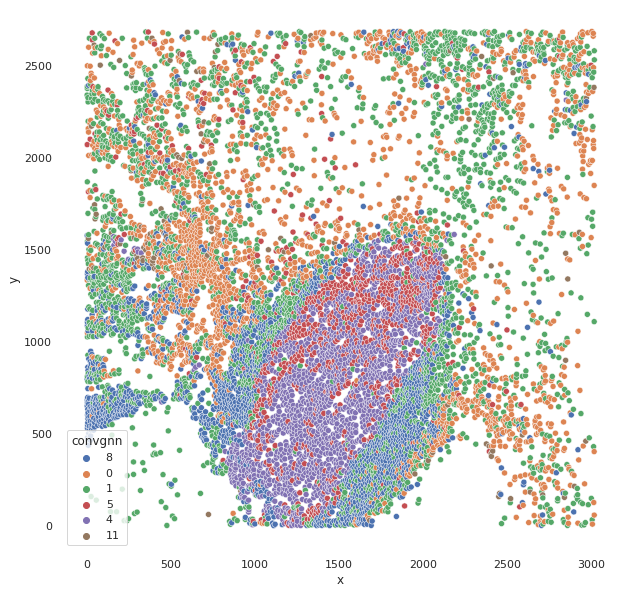

In [80]:
cond_b = df_full_noMix50k['convgnn'].isin(['0','1','11',
                                  '4','5','8'])

df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k_6fov_B, x="x", y="y", hue="convgnn",legend="full"
)

/tmp/ipykernel_24363/1819426574.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]


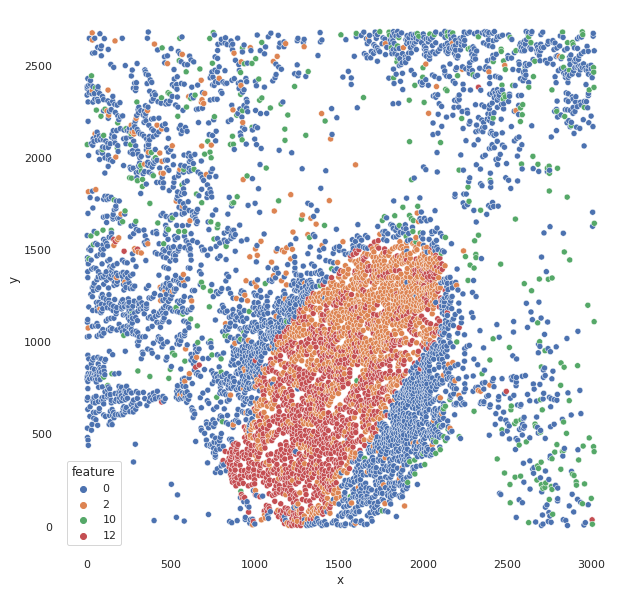

In [78]:
cond_b = df_full_noMix50k['feature'].isin(['0','10','12',
                                  '2'])

df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k_6fov_B, x="x", y="y", hue="feature",legend="full"
)

/tmp/ipykernel_24363/2588396940.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]


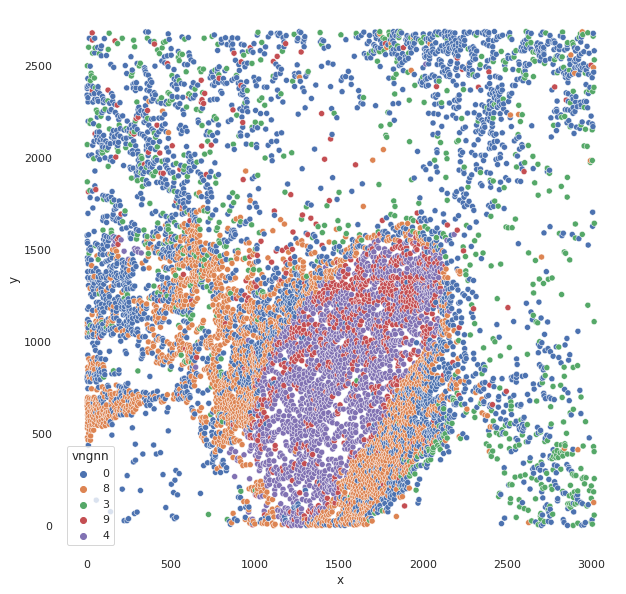

In [83]:
cond_b = df_full_noMix50k['vngnn'].isin(['0','3','4','8',
                                  '9'])

df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k_6fov_B, x="x", y="y", hue="vngnn",legend="full"
)

/tmp/ipykernel_24363/155317975.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]


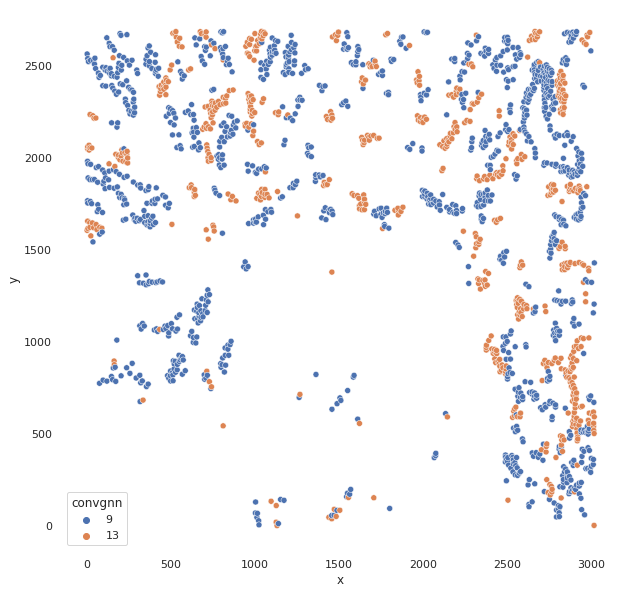

In [86]:
cond_b = df_full_noMix50k['convgnn'].isin(['13','9'])

df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k_6fov_B, x="x", y="y", hue="convgnn",legend="full"
)

/tmp/ipykernel_24363/1981087354.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]


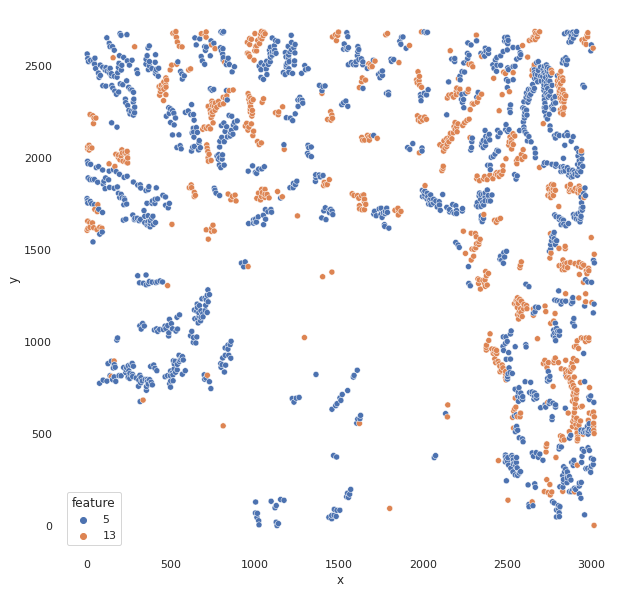

In [87]:
cond_b = df_full_noMix50k['feature'].isin(['5','13'])

df_full_noMix50k_6fov_B = df_full_noMix50k_6fov[cond_b]

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k_6fov_B, x="x", y="y", hue="feature",legend="full"
)

In [45]:
df_full_noMix50k_6fov['cell_view'] = df_full_noMix50k_6fov['PointNum'].map({'reg001_X02_Y05_Z09': 1,
                                                                            'reg001_X02_Y06_Z08': 2,
                                                                           'reg001_X02_Y07_Z09' : 3,
                                                                           'reg001_X03_Y05_Z08' : 4,
                                                                           'reg001_X03_Y06_Z08' : 5,
                                                                           'reg001_X03_Y07_Z08' : 6})
df_full_noMix50k_6fov

/tmp/ipykernel_24363/3329852619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_noMix50k_6fov['cell_view'] = df_full_noMix50k_6fov['PointNum'].map({'reg001_X02_Y05_Z09': 1,


Unnamed: 0  cellLabelInImage  cellSize      HOECHST1      CD38  \
0               1                 1        45   7577.133333  0.042709   
1               2                 2        67   5689.014925  0.411814   
2               3                 3        54   2918.629630  0.181537   
4               5                 5        40   3712.550000  0.105352   
5               6                 6        65   9896.523077  0.109826   
...           ...               ...       ...           ...       ...   
54024       54828              4360        39  10872.512821  1.000000   
54025       54829              4361        89   8327.550562  0.514414   
54026       54830              4362        41   8608.756098  0.090276   
54027       54831              4363        66  10190.621212  0.068102   
54028       54833              4365        47  12272.638298  0.000000   

           CD19      CD31  Vimentin      CD22      Ki67  ...      CD27  \
0      0.126471  0.013933  0.167720  0.378127  0.022083  ...  0.017326   
1      0.274831  0.078204  0.242115  0.732288  0.032531  ...  0.296546   
2      0.049070  0.107920  0.256650  0.136265  0.046391  ...  0.029158   
4      0.355472  0.123463  1.000000  0.244163  0.039550  ...  0.024758   
5      0.489116  0.077057  0.566872  1.000000  0.021881  ...  0.065785   
...         ...       ...       ...       ...       ...  ...       ...   
54024  0.184211  1.000000  0.607536  0.075974  0.047939  ...  1.000000   
54025  0.069560  0.169769  1.000000  0.040431  0.055847  ...  0.553570   
54026  0.005886  0.000000  0.341352  0.025815  0.020430  ...  0.466181   
54027  0.028343  0.075286  1.000000  0.002244  0.022702  ...  1.000000   
54028  0.172567  0.000000  0.215378  0.055495  0.021101  ...  1.000000   

          CD104     CD273  FAPalpha  Ecadherin            PointNum  \
0      0.016006  0.021456  0.000000   0.294373  reg001_X02_Y05_Z09   
1      0.046936  0.242958  0.195214   0.518544  reg001_X02_Y05_Z09   
2      0.066806  0.087647  0.168854   0.798743  reg001_X02_Y05_Z09   
4      0.139895  0.123207  0.769419   0.384925  reg001_X02_Y05_Z09   
5      0.022732  0.033790  0.159045   0.220309  reg001_X02_Y05_Z09   
...         ...       ...       ...        ...                 ...   
54024  0.034728  0.374752  0.163529   0.631821  reg001_X03_Y07_Z08   
54025  0.404908  0.491789  0.541567   0.646953  reg001_X03_Y07_Z08   
54026  0.052580  0.054227  0.064623   0.053586  reg001_X03_Y07_Z08   
54027  0.092961  0.216834  0.422081   0.236526  reg001_X03_Y07_Z08   
54028  0.000000  0.216259  0.525181   0.246806  reg001_X03_Y07_Z08   

       cluster.term  seurat_res1.0  convgnn  cell_view  
0       B-CD22-CD40              4        8          1  
1       B-CD22-CD40              8        0          1  
2         Fibro/Epi             15       14          1  
4       B-CD22-CD40              7        8          1  
5       B-CD22-CD40              0        8          1  
...             ...            ...      ...        ...  
54024        Plasma             10        6          6  
54025         CD4 T              1        7          6  
54026         CD4 T              3        2          6  
54027         CD8 T              2        3          6  
54028         CD4 T              1        7          6  

[22037 rows x 55 columns]

In [ ]:
path_to_segmentation = '/home/bkzhu/spatial_clustering/phase2/data/tonsil/Images_singleChannel_0503seg/'
shape_of_views = [3, 2]
shape_of_each_view = [1008, 1344]

In [ ]:
## do gnn labels
temp_label = [x if x == 0 or x == 1 or x == 5  else 2 for x in list(map(str, feature_labels_conv))]
# plot specific
tp2 = df_full_noMix50k_6fov.copy()
tp2['temp_label'] = temp_label
views = [x+1 for x in range(63)]
islands_pca_annotation, idx_to_label = utils.fill_clusters_to_segmentation(
    tp2, views, [9, 7],
    path_to_segmentation, ['cell_view', 'cellLabelInImage', 'temp_label']
)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

plt.rcParams["figure.figsize"] = (15, 15)
from matplotlib import colors
cmap = colors.ListedColormap(["white","#6BCB77","#FF6B6B","#DDDDDD", "#4D96FF"])
im = plt.imshow(islands_pca_annotation, interpolation='none', cmap=cmap)
# get unique values in image 
values = np.unique(islands_pca_annotation.ravel())
# get the colors of the values, according to the colormap used by imshow
colors = [im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=colors[i], label=idx_to_label[i]) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
#plt.savefig('/content/drive/MyDrive/Cell_Image_Clustering/Codex_Data/plots/gnn_bcells_2.png',dpi = 500)
plt.show()
